In [1]:
import pandas as pd

In [2]:
diffusion = pd.read_csv('ADDITIONAL_FEATURES2.csv', index_col = 'Subject')
DTI_DF = pd.read_csv('DTI_DF.csv')
# diffusion = diffusion.drop(diffusion.columns[26:33], axis=1)
# diffusion = diffusion.dropna()
# diffusion.index = diffusion.index.astype(int)
# diffusion[0:5]
(DTI_DF.shape, diffusion.shape)

((888, 17), (967, 132))

In [3]:
DTI_DF

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,L_rostralanteriorcingulate_cortex,L_rostralanteriorcingulate_cortex,L_thalamus,L_thalamus,L_hippocampus,R_rostralanteriorcingulate_cortex,R_rostralanteriorcingulate_cortex,R_thalamus,R_hippocampus,L_rostralanteriorcingulate_cortex,L_thalamus,L_hippocampus,L_amygdala,L_rostralanteriorcingulate_cortex,L_hippocampus,L_amygdala
1,1,L_thalamus,L_amygdala,L_hippocampus,R_hippocampus,L_amygdala,R_thalamus,R_amygdala,R_hippocampus,R_amygdala,R_thalamus,R_rostralanteriorcingulate_cortex,R_thalamus,R_rostralanteriorcingulate_cortex,R_amygdala,R_amygdala,R_hippocampus
2,100206,56.0,582.0,1134.0,1.0,230.0,31.0,871.0,191.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100307,178.0,1572.0,247.0,151.0,1198.0,5.0,954.0,577.0,339.0,1.0,2.0,22.0,6.0,NaN,NaN,NaN
4,100408,373.0,490.0,1418.0,NaN,1710.0,16.0,55.0,57.0,85.0,2.0,NaN,5.0,NaN,1.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,990366,16.0,71.0,346.0,18.0,170.0,4.0,254.0,248.0,646.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
884,991267,419.0,1163.0,2728.0,NaN,1291.0,22.0,105.0,1912.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,992774,286.0,1585.0,885.0,NaN,3180.0,152.0,179.0,885.0,333.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
886,995174,157.0,535.0,1752.0,5.0,988.0,37.0,1583.0,2219.0,1426.0,73.0,NaN,190.0,NaN,NaN,NaN,NaN


In [4]:
behavior = diffusion.iloc[:, 4:6]
anger = behavior.iloc[:,0]
fear = behavior.iloc[:,1]
anger

Subject
100206    7.0
100307    8.0
100408    8.0
100610    8.0
101006    6.0
         ... 
992673    6.0
992774    5.0
993675    7.0
995174    6.0
996782    6.0
Name: ER40ANG, Length: 967, dtype: float64

In [5]:
nan_rows = anger[anger.isna()]

print("Rows with NaN in 'anger':")
print(nan_rows.index)

nan_rows = fear[fear.isna()]

print("Rows with NaN in 'fear':")
print(nan_rows.index)

Rows with NaN in 'anger':
Int64Index([116120, 117728, 145531, 236130, 355845, 734247], dtype='int64', name='Subject')
Rows with NaN in 'fear':
Int64Index([116120, 117728, 145531, 236130, 355845, 734247], dtype='int64', name='Subject')


In [6]:
anger = anger.dropna()
fear = fear.dropna()

diffusion = diffusion.loc[anger.index]

In [7]:
node_pairs = list(zip(DTI_DF.iloc[0, 1:], DTI_DF.iloc[1, 1:]))
node_pairs

[('L_rostralanteriorcingulate_cortex', 'L_thalamus'),
 ('L_rostralanteriorcingulate_cortex', 'L_amygdala'),
 ('L_thalamus', 'L_hippocampus'),
 ('L_thalamus', 'R_hippocampus'),
 ('L_hippocampus', 'L_amygdala'),
 ('R_rostralanteriorcingulate_cortex', 'R_thalamus'),
 ('R_rostralanteriorcingulate_cortex', 'R_amygdala'),
 ('R_thalamus', 'R_hippocampus'),
 ('R_hippocampus', 'R_amygdala'),
 ('L_rostralanteriorcingulate_cortex', 'R_thalamus'),
 ('L_thalamus', 'R_rostralanteriorcingulate_cortex'),
 ('L_hippocampus', 'R_thalamus'),
 ('L_amygdala', 'R_rostralanteriorcingulate_cortex'),
 ('L_rostralanteriorcingulate_cortex', 'R_amygdala'),
 ('L_hippocampus', 'R_amygdala'),
 ('L_amygdala', 'R_hippocampus')]

In [8]:
regions = set()
for pair in node_pairs:
    regions.update(pair)

print("Relevant Regions:", regions)

Relevant Regions: {'L_hippocampus', 'R_thalamus', 'L_amygdala', 'R_amygdala', 'R_rostralanteriorcingulate_cortex', 'L_rostralanteriorcingulate_cortex', 'L_thalamus', 'R_hippocampus'}


In [9]:
columns_of_interest = ['FS_L_Thalamus_Vol', 'FS_R_Thalamus_Vol', 'FS_L_Hippo_Vol', 'FS_R_Hippo_Vol', 'FS_L_Amygdala_Vol', 'FS_R_Amygdala_Vol', 'FS_L_Rostralanteriorcingulate_Thck', 'FS_L_Rostralanteriorcingulate_Area', 'FS_R_Rostralanteriorcingulate_Thck', 'FS_R_Rostralanteriorcingulate_Area']

In [10]:
import networkx as nx

node_embeddings_df = diffusion[columns_of_interest]

column_to_node_mapping = {
    'FS_L_Thalamus_Vol': 'L_thalamus',
    'FS_R_Thalamus_Vol': 'R_thalamus',
    'FS_L_Hippo_Vol': 'L_hippocampus',
    'FS_R_Hippo_Vol': 'R_hippocampus',
    'FS_L_Amygdala_Vol': 'L_amygdala',
    'FS_R_Amygdala_Vol': 'R_amygdala',
    'FS_L_Rostralanteriorcingulate_Thck': 'L_rostralanteriorcingulate_cortex',
    'FS_L_Rostralanteriorcingulate_Area': 'L_rostralanteriorcingulate_cortex',
    'FS_R_Rostralanteriorcingulate_Thck': 'R_rostralanteriorcingulate_cortex',
    'FS_R_Rostralanteriorcingulate_Area': 'R_rostralanteriorcingulate_cortex',
}

graphs = []

# Step 1: Generate graphs with edges from DTI_DF
for idx, row in DTI_DF.iloc[2:].iterrows():
    subject_id = row.iloc[0]  # First column is the subject ID
    G = nx.Graph()  # Create an undirected graph (use nx.DiGraph() if directed)
    
    # Add nodes (unique regions) to the graph
    regions = set([region for pair in node_pairs for region in pair])
    G.add_nodes_from(regions)
    
    # Add edges with weights, skipping NaN values
    for i, (region1, region2) in enumerate(node_pairs):
        weight = row.iloc[i + 1]
        if pd.notna(weight):  # Check if the weight is not NaN
            G.add_edge(region1, region2, weight=weight)
    
    # Step 2: Add node embeddings from the diffusion dataframe based on the subject ID
    if subject_id in diffusion.index:  # Check if the subject ID exists in the diffusion DataFrame
        embedding_row = diffusion.loc[subject_id, columns_of_interest]
        for col, node in column_to_node_mapping.items():
            if node in G:
                G.nodes[node]['embedding'] = [embedding_row[col]]  # Assign the embedding
    
    # Assign the subject ID to the graph as an attribute
    G.graph['subject_id'] = subject_id
    
    # Add the graph to the list of graphs
    graphs.append(G)

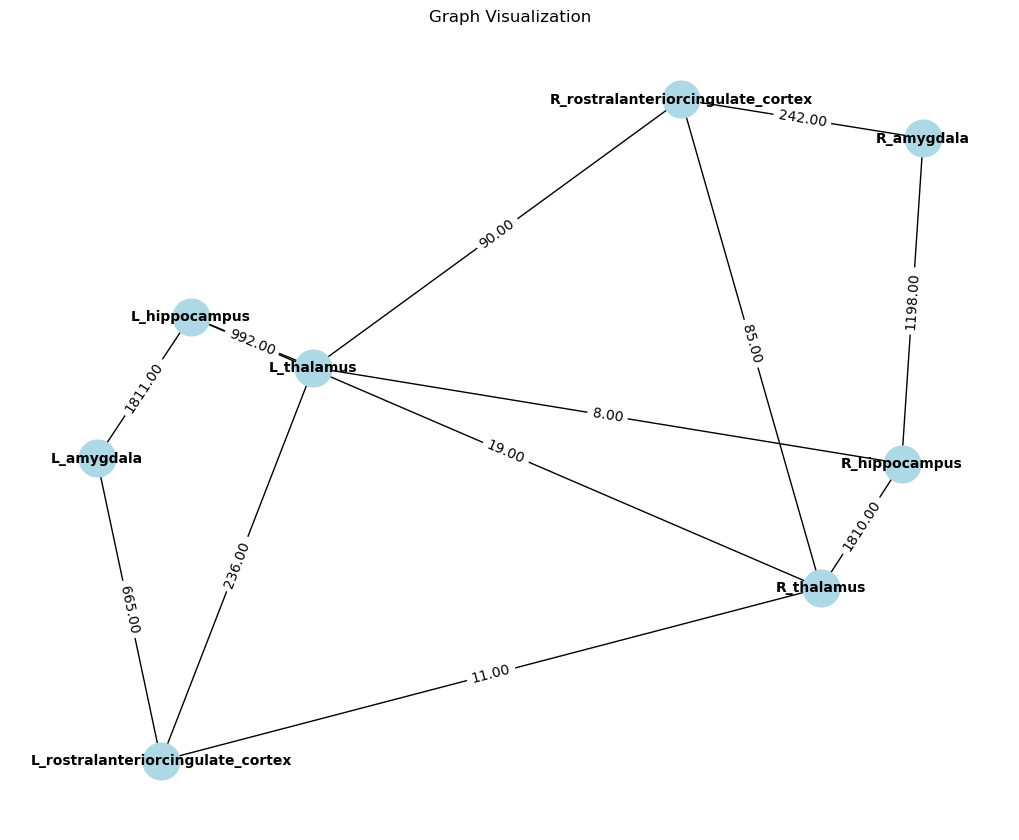

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Select one of the graphs to visualize
G = graphs[3]

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Use spring layout for better visual separation
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")

# Handle potential string values in edge weights
edge_labels = {}
for u, v, d in G.edges(data=True):
    try:
        edge_labels[(u, v)] = f'{float(d["weight"]):.2f}'
    except ValueError:
        edge_labels[(u, v)] = d["weight"]  # If it's not a number, just use the raw value

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Visualization")
plt.show()

In [12]:
anger.nunique()

7

In [13]:
print(anger.unique())
print(anger.isnull().sum()) 

[7. 8. 6. 5. 4. 2. 3.]
0


In [14]:
# Sort the unique labels in increasing order
sorted_labels = sorted(anger.unique())  # Ensure no NaNs

# Create a mapping from the original labels to sequential integers
label_mapping = {original_label: new_label for new_label, original_label in enumerate(sorted_labels)}
anger_mapped = anger.map(label_mapping)

# Print the new mapping to verify
print("Class mapping:", label_mapping)
print("Mapped classes:", sorted(anger_mapped.unique()))

# Now, the num_classes should be set correctly based on the remapped labels
num_classes = len(sorted_labels)

Class mapping: {2.0: 0, 3.0: 1, 4.0: 2, 5.0: 3, 6.0: 4, 7.0: 5, 8.0: 6}
Mapped classes: [0, 1, 2, 3, 4, 5, 6]


In [15]:
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.utils import from_networkx
from sklearn.model_selection import train_test_split


# Step 1: Map the 'anger' labels to the graphs
anger_labels = anger_mapped
graph_data_list = []

for G in graphs:
    subject_id = G.graph['subject_id']
    
    if subject_id in anger_labels.index:
        # Convert the NetworkX graph to a PyTorch Geometric graph
        pyg_data = from_networkx(G)
        
        # Add node features (embeddings) to the graph
        pyg_data.x = torch.tensor([G.nodes[node]['embedding'] for node in G.nodes], dtype=torch.float)
        
        # Add the corresponding label to the graph
        label = torch.tensor([anger_labels.loc[subject_id]], dtype=torch.long)  # Ensure this is a long tensor for classification
        pyg_data.y = label

        # Manually add subject_id to the Data object
        pyg_data.subject_id = subject_id
        
        # Add the graph to the list
        graph_data_list.append(pyg_data)

In [16]:
# Step 2: Split the dataset into training and testing sets
train_ids, test_ids = train_test_split(anger_labels.index, test_size=0.2, random_state=42)

# Split the graph_data_list based on the training and testing IDs
train_graphs = [data for data in graph_data_list if data.subject_id in train_ids]
test_graphs = [data for data in graph_data_list if data.subject_id in test_ids]

# Step 3: Create DataLoaders for training and testing
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

# Debug: Check the size of the loaders
print(f"Number of training graphs: {len(train_loader.dataset)}")
print(f"Number of testing graphs: {len(test_loader.dataset)}")

Number of training graphs: 712
Number of testing graphs: 173


In [17]:
class GNN(torch.nn.Module):
    def __init__(self, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels=1, out_channels=64, normalize=True)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 256)
        self.fc1 = torch.nn.Linear(256, 128)
        self.fc2 = torch.nn.Linear(128, num_classes)
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr

        if edge_weight is not None:
            edge_weight = edge_weight / edge_weight.max()

        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.conv3(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Global pooling (e.g., mean pooling)
        x = global_mean_pool(x, data.batch)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Logits output, no activation function here since CrossEntropyLoss expects raw logits
        
        return x

In [18]:
# Initialize the model with the correct number of classes
model = GNN(num_classes=anger.nunique())

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()  # CrossEntropyLoss for multiclass classification

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
patience_counter = 0

def calculate_accuracy(loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            output = model(data)
            predicted = output.argmax(dim=1)
            correct += (predicted == data.y).sum().item()
            total += data.y.size(0)
    return correct / total

In [19]:
# Training loop with early stopping
for epoch in range(100):  # Adjust the number of epochs as needed
    model.train()
    epoch_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y.long())  # Ensure data.y uses the remapped labels
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Calculate accuracy on the training set
    train_accuracy = calculate_accuracy(train_loader)
    
    # Calculate accuracy on the test set
    test_accuracy = calculate_accuracy(test_loader)

    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    # Early stopping logic
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0  # Reset the counter if we get a better loss
    else:
        patience_counter += 1  # Increment the counter if no improvement
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

Epoch 1, Loss: 382.8794, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 2, Loss: 153.6587, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 3, Loss: 89.5075, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 4, Loss: 57.7977, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 5, Loss: 47.4140, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 6, Loss: 43.5132, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 7, Loss: 39.6959, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 8, Loss: 36.8012, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 9, Loss: 36.0078, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 10, Loss: 33.3971, Train Accuracy: 0.2612, Test Accuracy: 0.2601
Epoch 11, Loss: 33.1956, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 12, Loss: 32.6800, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 13, Loss: 32.8023, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 14, Loss: 32.8881, Train Accuracy: 0.3497, Test Accuracy: 0.3468
Epoch 15, Los